<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/BENCKMARK_Renta_Fija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install skforecast

In [1]:
from openpyxl import workbook , load_workbook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # Regresion multiple
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import statsmodels.api as sm
import statistics
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [22]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

In [23]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Modelo = pd.read_excel("/content/drive/MyDrive/CORFICOLOMBIANA/Base Indices.xlsx", sheet_name="Indices",header=0, index_col="Fecha") 
Modelo = pd.DataFrame(Modelo)
Modelo.tail()

,COLTES UVR,COLTES CP UVR,COLTES LP UVR,COLTES,COLTES CP,COLTES LP
Fecha,,,,,,
2022-12-21,316.80,112.28,93.60,263.19,256.97,278.24
2022-12-22,317.92,112.51,94.00,263.58,257.46,278.59
2022-12-23,317.91,112.73,93.91,264.82,258.34,280.12
2022-12-26,318.14,112.92,93.94,263.84,258.20,278.55
2022-12-27,317.73,113.05,93.71,262.18,257.72,276.04


In [6]:
Modelo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2022-06-28 to 2022-12-27
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COLTES UVR     124 non-null    float64
 1   COLTES CP UVR  124 non-null    float64
 2   COLTES LP UVR  124 non-null    float64
 3   COLTES         124 non-null    float64
 4   COLTES CP      124 non-null    float64
 5   COLTES LP      124 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


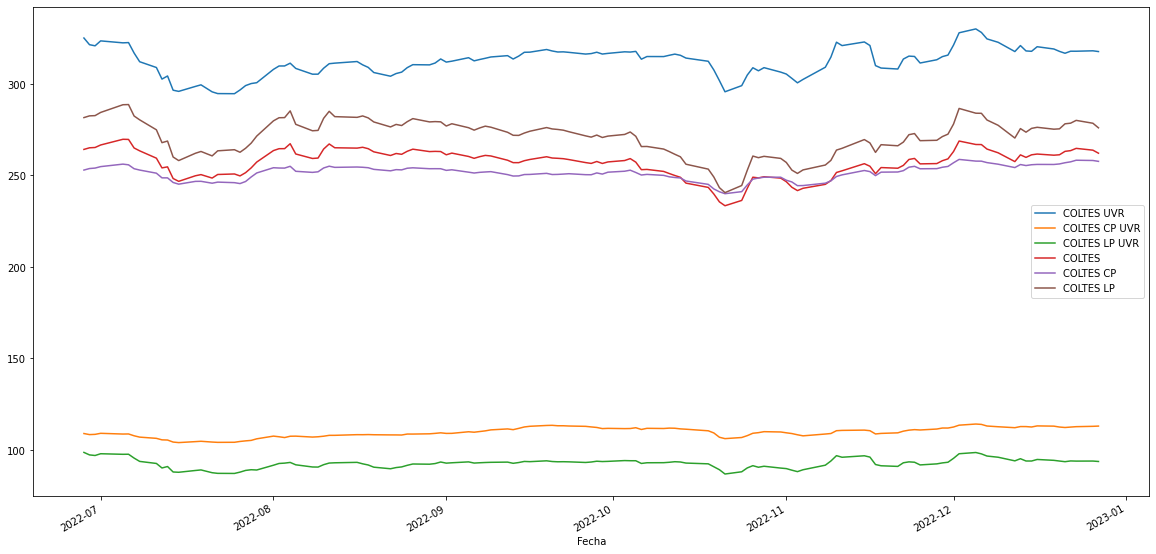

In [7]:
Modelo.plot()

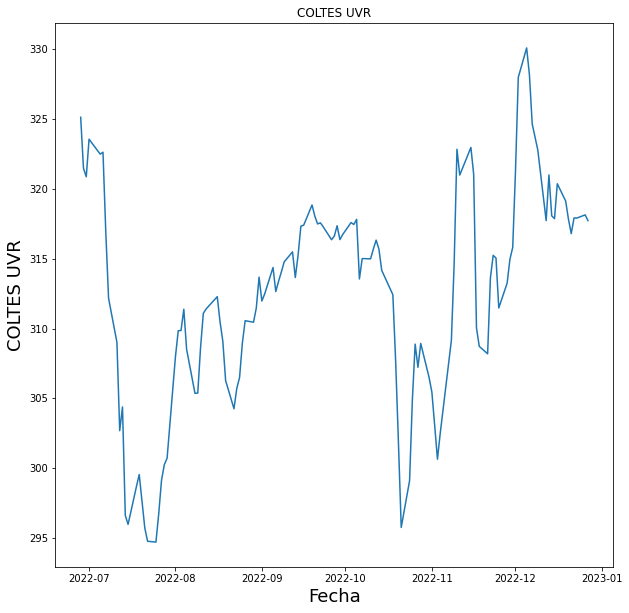

In [8]:
plt.figure(figsize=(10,10))
plt.title('COLTES UVR')
plt.plot(Modelo['COLTES UVR'])
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('COLTES UVR',fontsize=18)
plt.show()

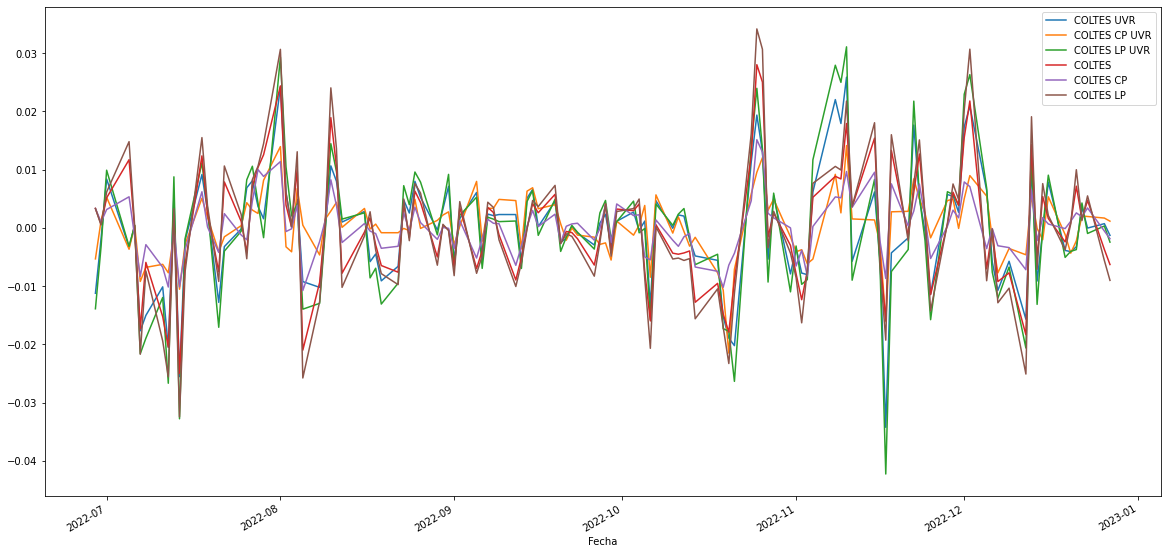

In [9]:
Retornos = Modelo.pct_change() 
Retornos.plot()

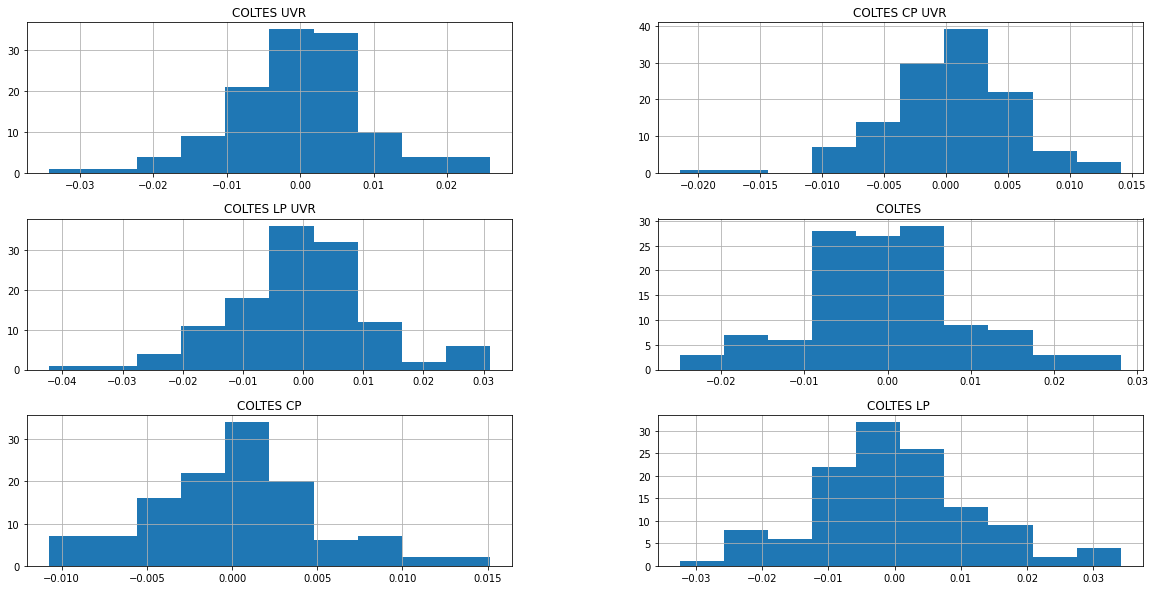

In [10]:
Retornos.hist()
plt.show()

In [11]:
Modelo.describe()

,COLTES UVR,COLTES CP UVR,COLTES LP UVR,COLTES,COLTES CP,COLTES LP
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.00000
mean,312.381694,109.722823,92.708065,257.152419,251.560000,271.31871
std,7.710632,2.616329,2.580372,7.523217,3.911362,9.89684
min,294.700000,104.030000,86.860000,233.470000,240.050000,240.63000
25%,308.140000,108.127500,91.080000,252.077500,249.255000,264.74750
50%,313.640000,109.580000,93.010000,258.920000,251.915000,273.64000
75%,317.575000,111.950000,93.917500,263.067500,254.240000,278.34750
max,330.100000,114.170000,98.670000,269.790000,258.780000,288.76000


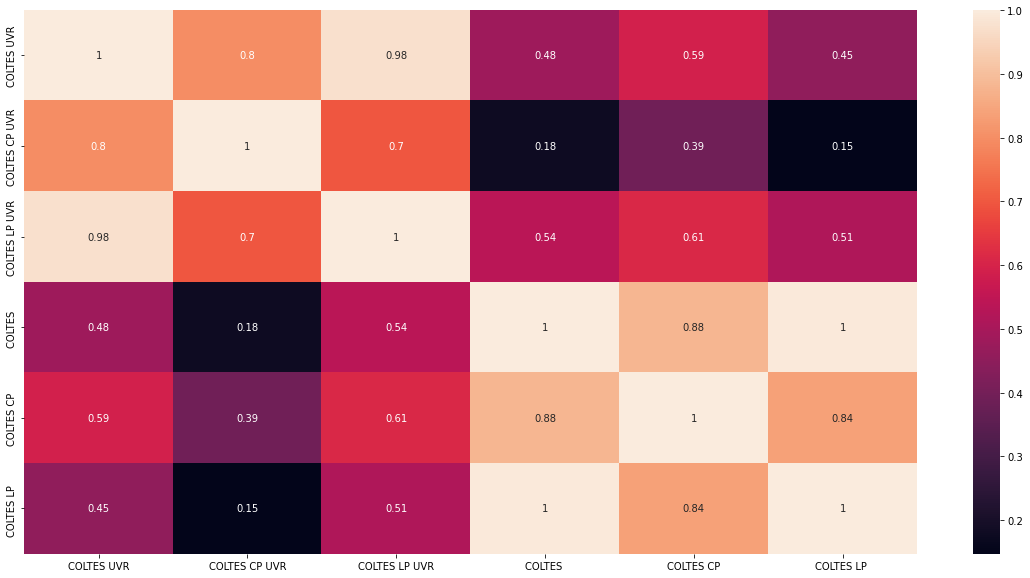

In [12]:
Modelo=Modelo.corr(method="spearman") 
sns.heatmap(Modelo,annot=True) # Diagrama de correlacion 

In [13]:
Coltes_UVR= Modelo['COLTES UVR']
Coltes_UVR

COLTES UVR       1.000000
COLTES CP UVR    0.798880
COLTES LP UVR    0.976091
COLTES           0.481078
COLTES CP        0.592245
COLTES LP        0.454721
Name: COLTES UVR, dtype: float64

In [14]:
dataset = Coltes_UVR.values
dataset

array([1.        , 0.7988796 , 0.97609089, 0.48107847, 0.59224471,
       0.45472127])

In [15]:
trading_data_len = math.ceil(len(dataset)* 8 )
trading_data_len

48

In [36]:
Prueba = pd.read_excel("/content/drive/MyDrive/CORFICOLOMBIANA/Prueba.xlsx", sheet_name="Datos",header=0,index_col="FECHA") 
Prueba.tail()

,COLTES,COLTES CP,COLTES LP
FECHA,,,
2022-12-20,261.32,256.31,275.49
2022-12-21,263.19,256.97,278.24
2022-12-22,263.58,257.46,278.59
2022-12-23,264.82,258.34,280.12
2022-12-24,263.84,258.20,278.55


#  **Machine learning**

In [170]:
steps = 250
Prueba_train = Prueba[:-steps]
Prueba_test  = Prueba[-steps:]

In [ ]:
print(f"Fechas train : {Prueba_train.index.min()} --- {Prueba_train.index.max()}  (n={len(Prueba_train)})")
print(f"Fechas test  : {Prueba_test.index.min()} --- {Prueba_test.index.max()}  (n={len(Prueba_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
Prueba_train['COLTES'].plot(ax=ax, label='train')
Prueba_test['COLTES'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train['COLTES'])
forecaster

In [ ]:
steps = 44
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

In [ ]:
import datetime
start = datetime.datetime.strptime("2022-12-1", "%Y-%m-%d")
date_generated = pd.date_range(start, periods=50)
print(date_generated.strftime("%d-%m-%Y"))

In [264]:
Fecha=pd.DataFrame(date_generated)
Predicion=pd.DataFrame(predicciones)
Predicion_l = pd.concat([Fecha, Predicion], axis=1,)
Predicion_2 = Predicion_l.set_index(0)

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
datos_train['COLTES'].plot(ax=ax, label='train')
datos_test['COLTES'].plot(ax=ax, label='test')
Predicion_2.plot(ax=ax, label='predicciones')
ax.legend();